In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
from BNN_Learning_Rate_Tuning import bnn_learning_rate_tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

total_epochs = 25
initial_lr = 1e-3
end_lr = 1e-4

validation_percentage = 0.15
window_size = 1
model_purpose = 'regression'
learning_rate_decay_type = 'exponential'

In [3]:
bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                feature_data, 
                                target_data, 
                                validation_percentage=validation_percentage, 
                                model_purpose=model_purpose, 
                                window_size=window_size,
                                initial_lr=initial_lr, 
                                end_lr=end_lr,
                                learning_rate_decay_type=learning_rate_decay_type,
                                total_epochs=total_epochs)

In [4]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 25 - Learning Rate : 0.0025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.09 Second
MSE : nan - Standard Deviation : nan
Validation MSE : nan - Validation Standard Deviation : nan
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 25 - Learning Rate : 0.00125 - Succesfull Train Percentage : 100.0% - Time Passed : 0.07 Second
MSE : nan - Standard Deviation : nan
Validation MSE : nan - Validation Standard Deviation : nan
--------------------------------------------------------------------------------------------------------------------------------------------

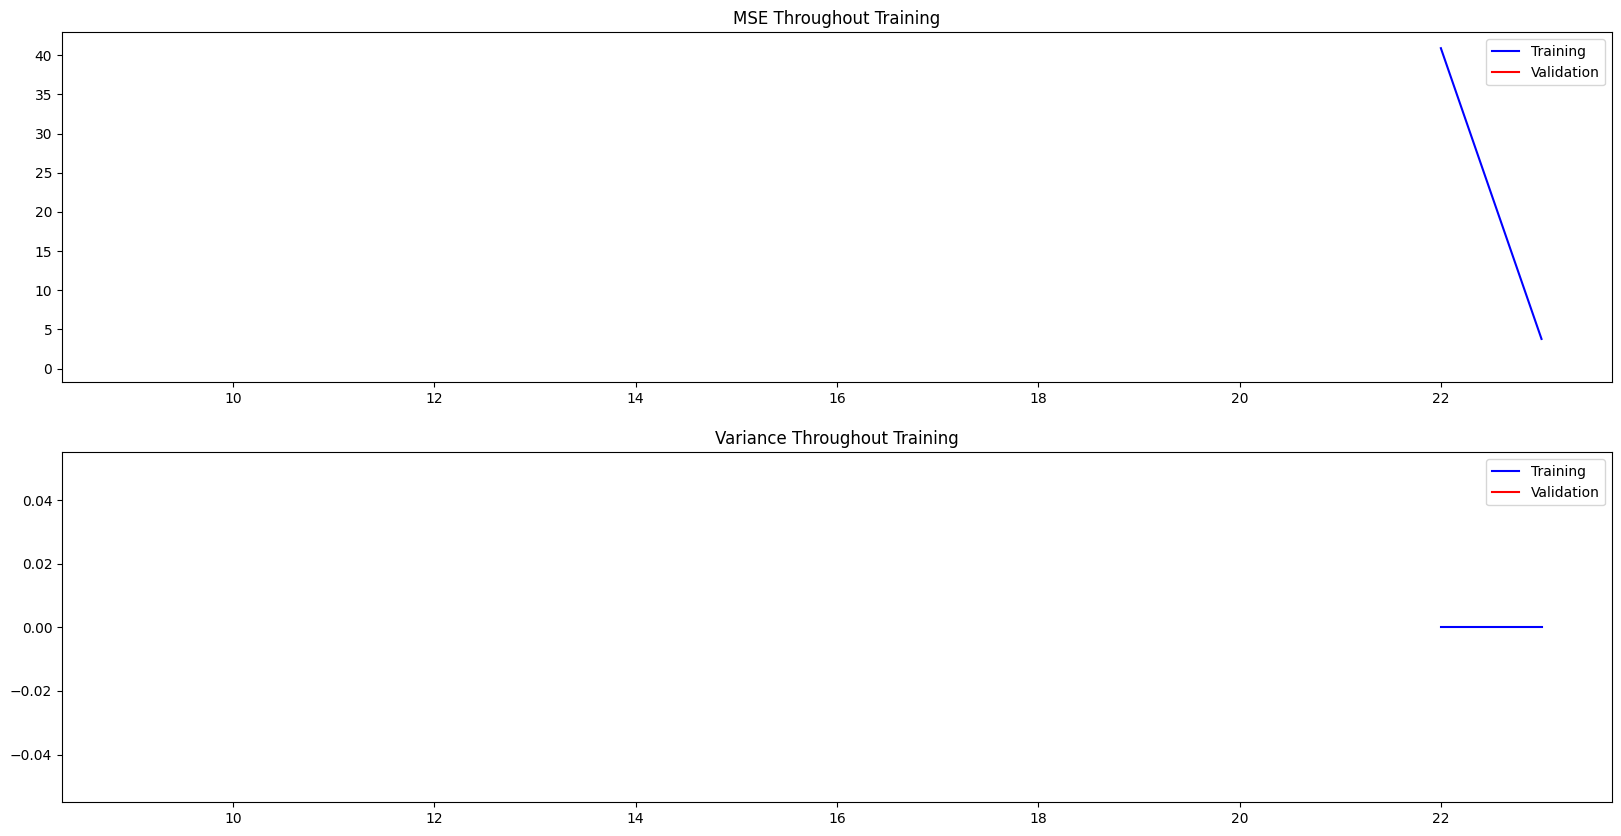

In [5]:
bnn.visualize_model_performance()

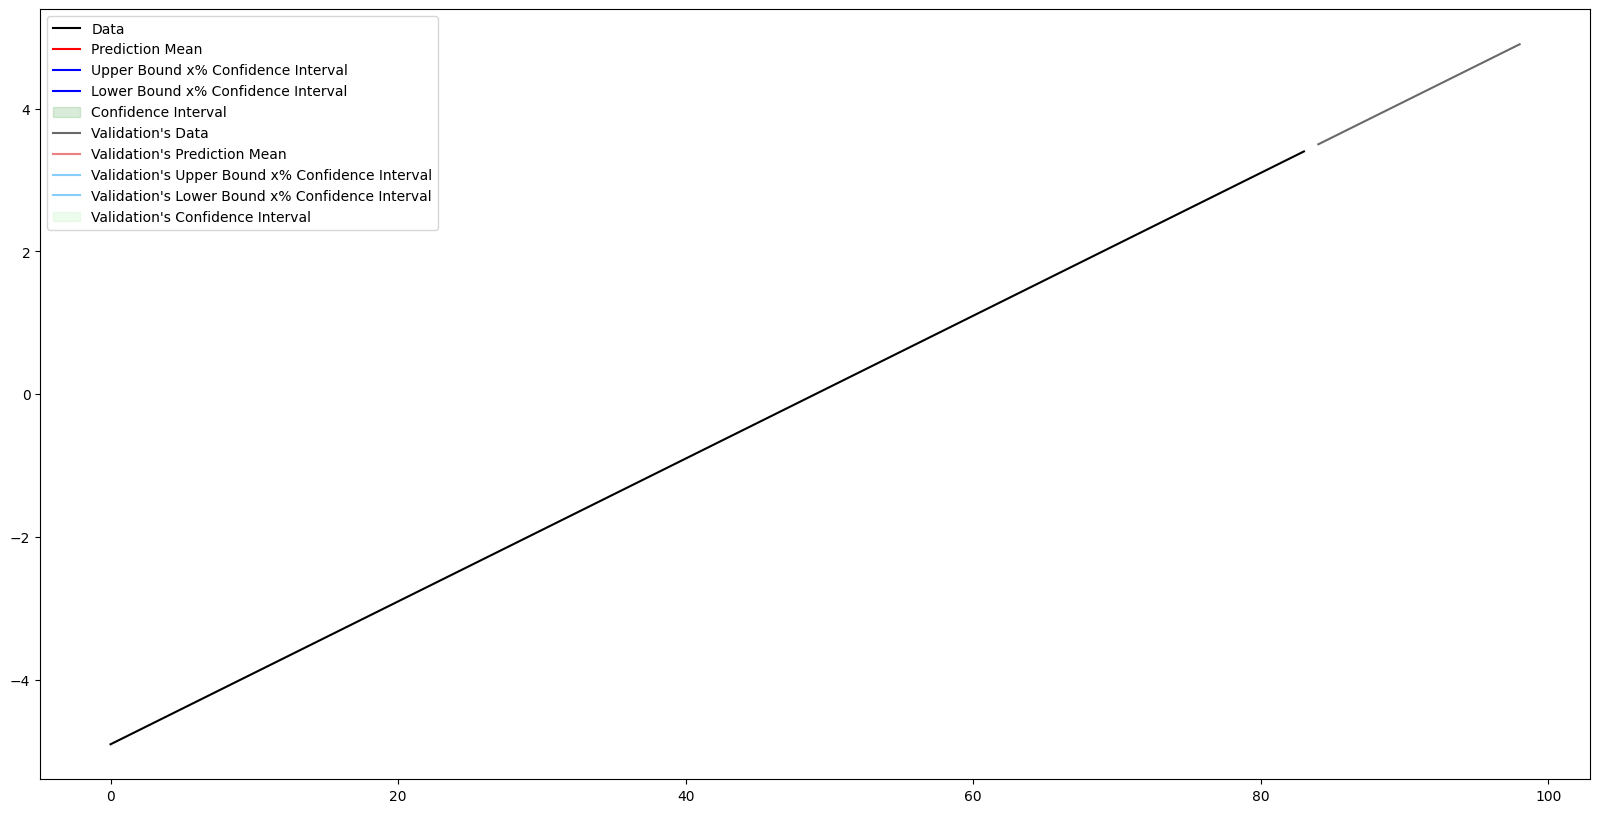

In [7]:
bnn.visualize_regression_predictions()

## On Sinusoidal Data

In [8]:
input_layer = [1]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

feature_data = y_data[:-1]
target_data = y_data[1:]

total_epochs = 25
initial_lr = 1e-2
end_lr = 1e-4

validation_percentage = 0.1
window_size = 1
model_purpose = 'regression'
learning_rate_decay_type = 'exponential'

In [9]:
bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                feature_data, 
                                target_data, 
                                validation_percentage=validation_percentage, 
                                model_purpose=model_purpose, 
                                window_size=window_size,
                                initial_lr=initial_lr, 
                                end_lr=end_lr,
                                learning_rate_decay_type=learning_rate_decay_type,
                                total_epochs=total_epochs)

In [11]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 25 - Learning Rate : 0.0025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.1 Second
MSE : 0.6625721152164207 - Standard Deviation : 0.3947065811136929
Validation MSE : 0.7463751124329521 - Validation Standard Deviation : 0.4839685332496725
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 25 - Learning Rate : 0.00125 - Succesfull Train Percentage : 100.0% - Time Passed : 0.08 Second
MSE : 0.5360659818166683 - Standard Deviation : 0.400510101044164
Validation MSE : 0.4962412999588022 - Validation Standard Deviation : 0.3849261763504363
----------------------

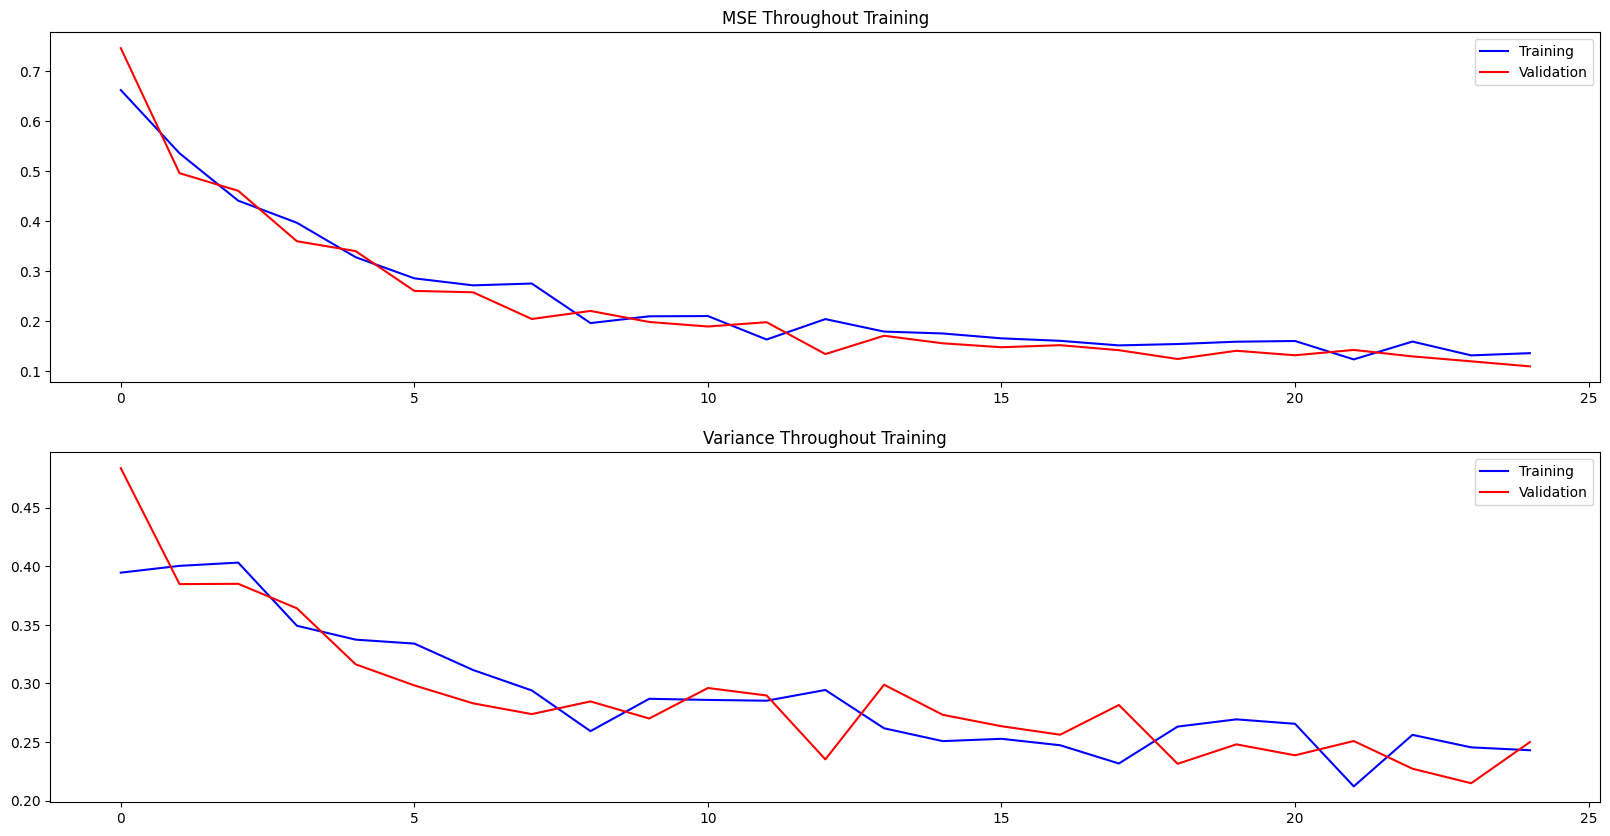

In [12]:
bnn.visualize_model_performance()

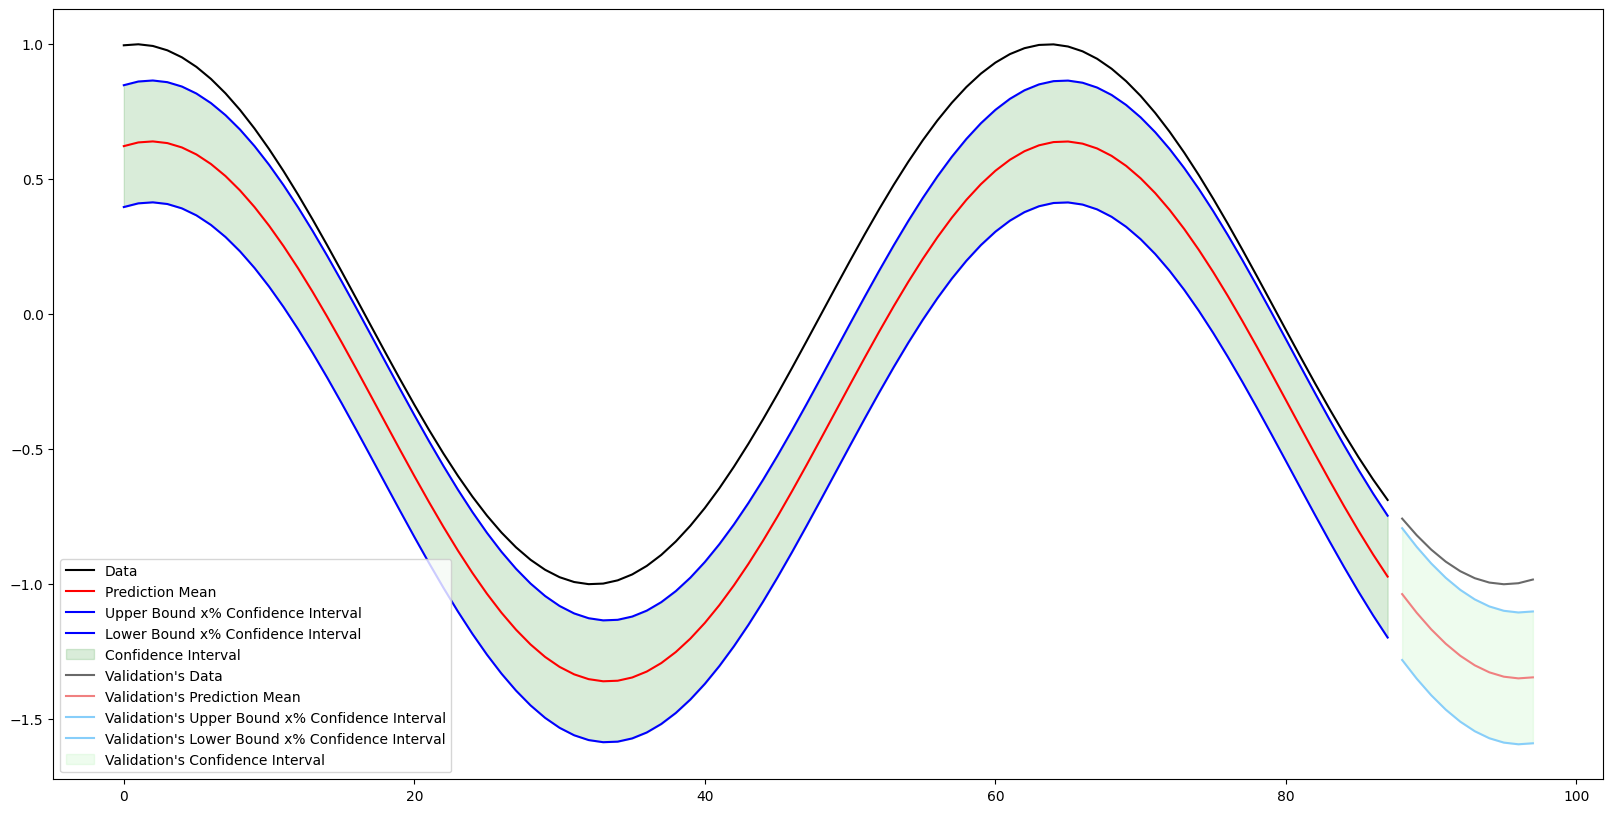

In [14]:
bnn.visualize_regression_predictions()

# Model Performance On Multiple Inputs

## On Linear Data

In [16]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1
end_lr = 1e-3

validation_percentage = 0.1
window_size = 2
model_purpose = 'regression'
learning_rate_decay_type = 'exponential'

In [17]:
bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                feature_data, 
                                target_data, 
                                validation_percentage=validation_percentage, 
                                model_purpose=model_purpose, 
                                window_size=window_size,
                                initial_lr=initial_lr, 
                                end_lr=end_lr,
                                learning_rate_decay_type=learning_rate_decay_type,
                                total_epochs=total_epochs)

In [19]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.05 - Succesfull Train Percentage : 100.0% - Time Passed : 0.14 Second
MSE : 1.2997167915960899 - Standard Deviation : 0.9143445173356707
Validation MSE : 1.213069823457525 - Validation Standard Deviation : 0.9870508489060358
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.12 Second
MSE : 0.3976542895702258 - Standard Deviation : 0.2492553593221597
Validation MSE : 0.3874869836217515 - Validation Standard Deviation : 0.23244597860853994
------------------------

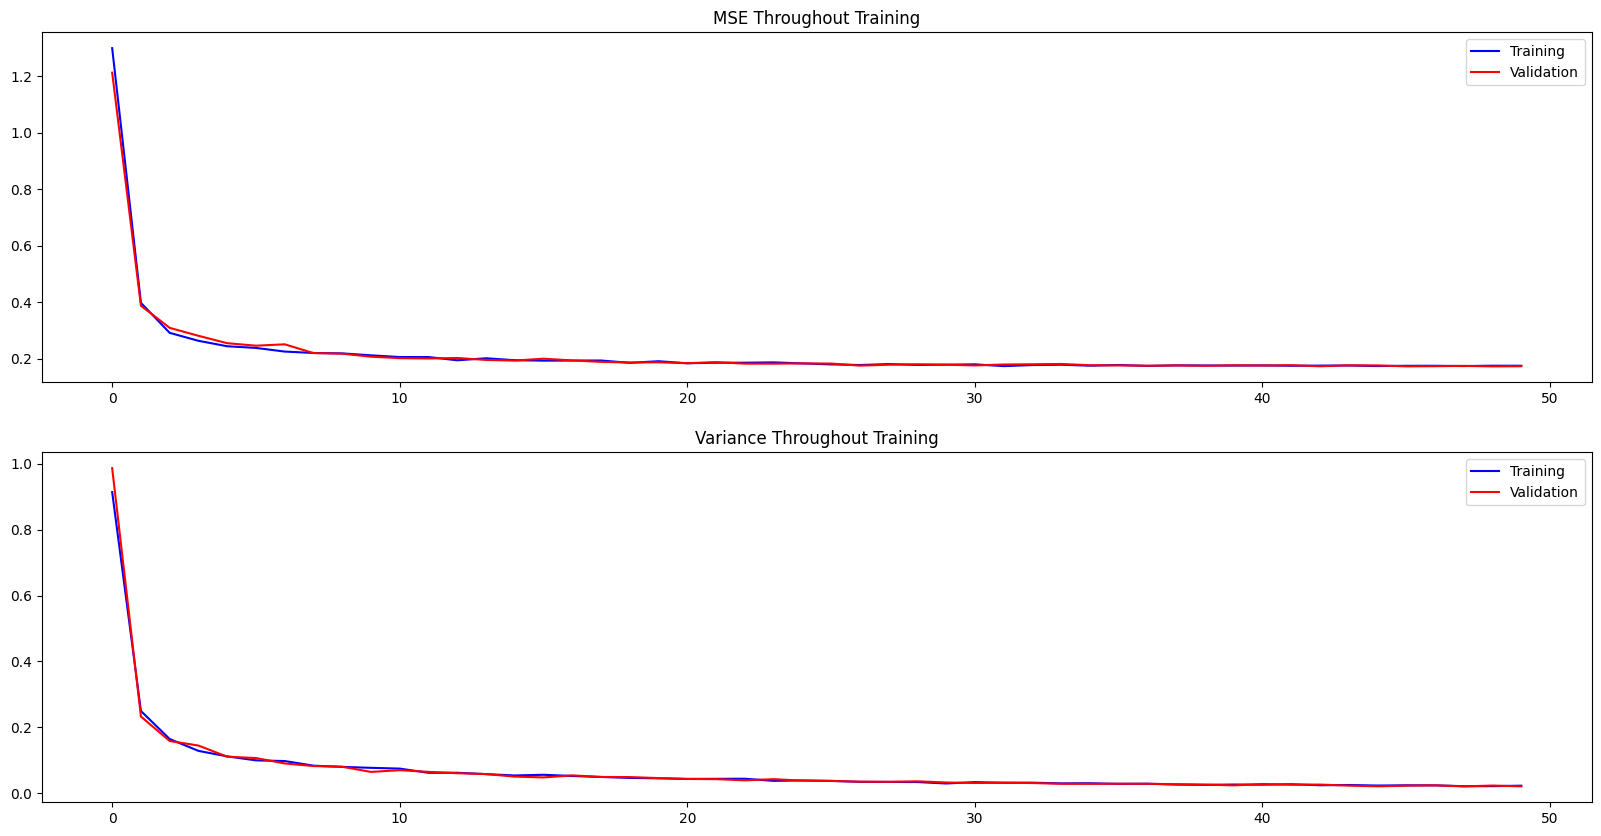

In [20]:
bnn.visualize_model_performance()

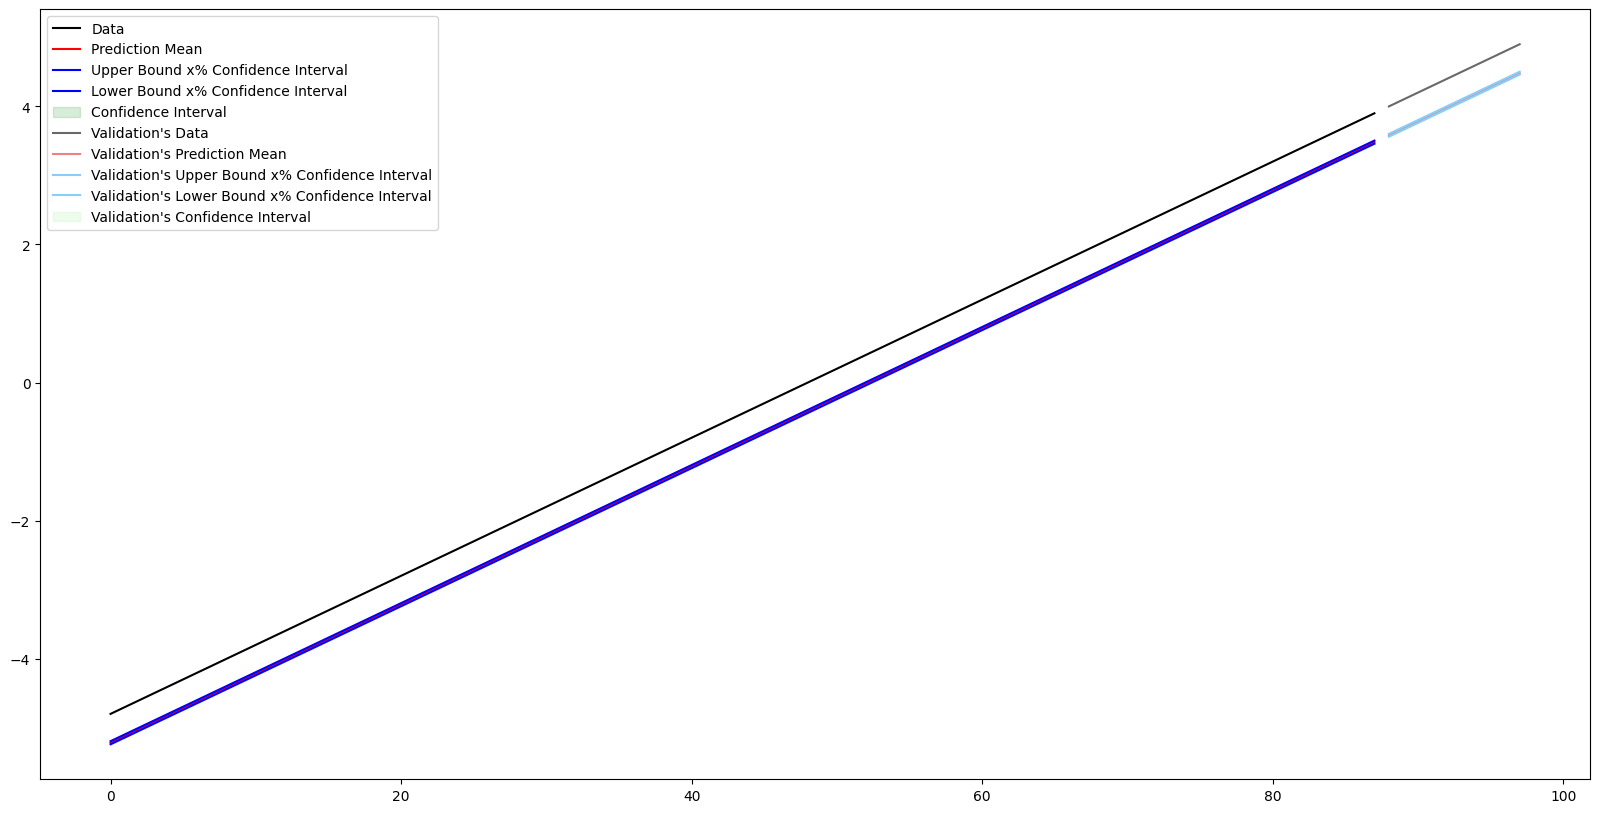

In [22]:
bnn.visualize_regression_predictions()

## On Sinusoidal Data

In [23]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

feature_data = y_data
target_data = y_data

validation_percentage = 0.1
total_epochs = 50
initial_lr = 1e-1
end_lr = 1e-5

window_size = 2
model_purpose = 'regression'
learning_rate_decay_type = 'exponential'

In [24]:
bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                feature_data, 
                                target_data, 
                                validation_percentage=validation_percentage, 
                                model_purpose=model_purpose, 
                                window_size=window_size,
                                initial_lr=initial_lr, 
                                end_lr=end_lr,
                                learning_rate_decay_type=learning_rate_decay_type,
                                total_epochs=total_epochs)

In [25]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.0005 - Succesfull Train Percentage : 100.0% - Time Passed : 0.14 Second
MSE : 18.817077203686832 - Standard Deviation : 1.1307952224251745
Validation MSE : 17.43842612032447 - Validation Standard Deviation : 1.4293458699768906
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.00025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.12 Second
MSE : 17.509324562345224 - Standard Deviation : 0.7748776745112722
Validation MSE : 19.26664692389233 - Validation Standard Deviation : 1.164157491189074
-----------------------

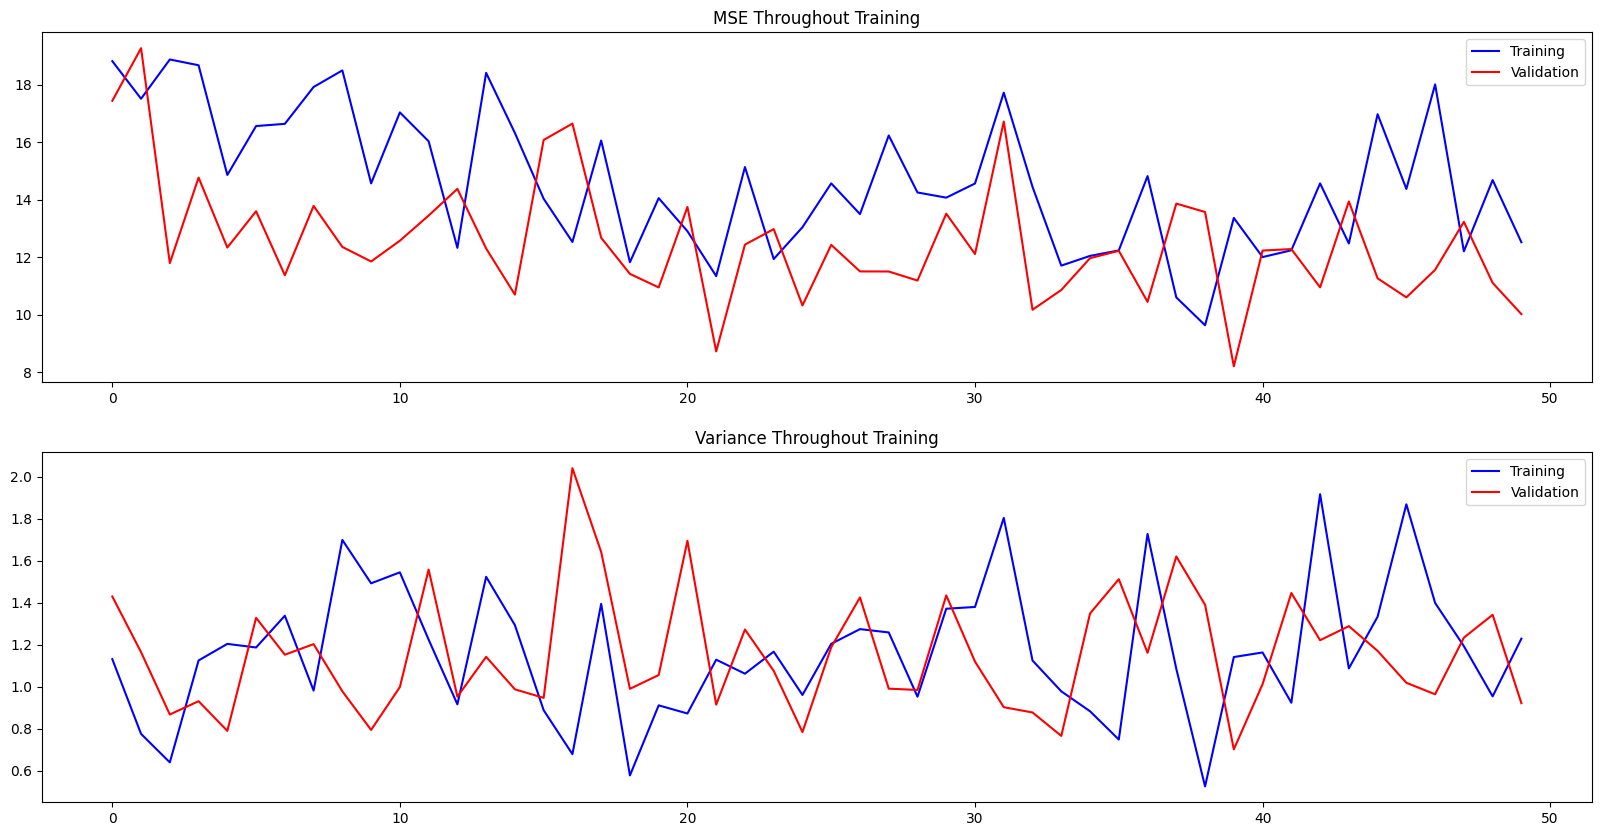

In [26]:
bnn.visualize_model_performance()

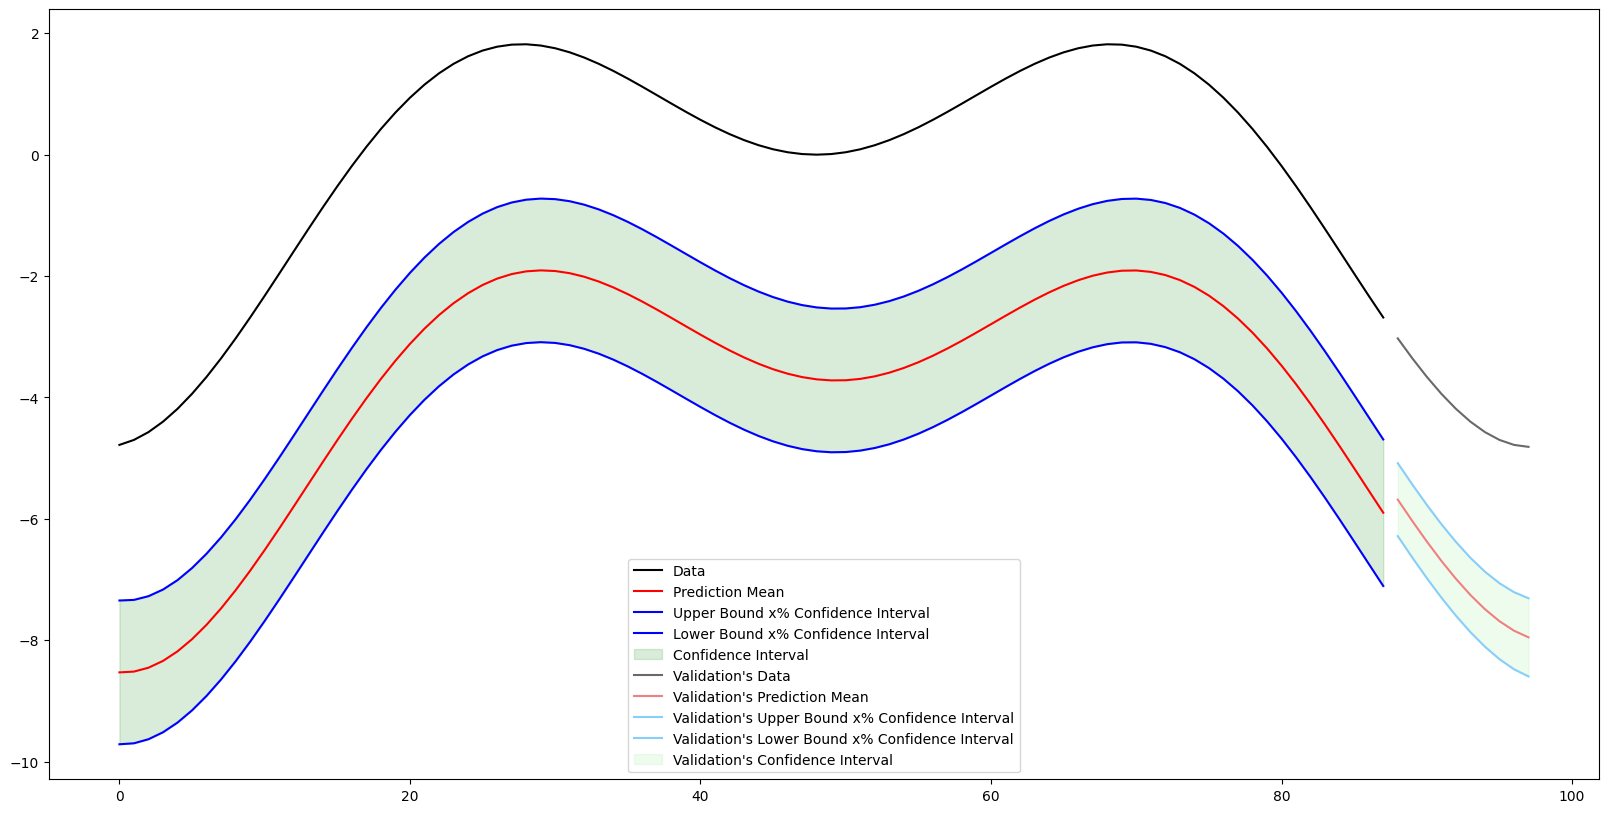

In [27]:
bnn.visualize_regression_predictions()

# Model Learning Rate Tuning

In [28]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

initial_lr_power = 2
end_lr_power = 4
total_iters = 5
tuning_epochs = 10
window_size = 1

model_purpose = 'regression'

In [29]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, 
                                         hidden_layers, 
                                         output_layer, 
                                         feature_data, 
                                         target_data, 
                                         model_purpose=model_purpose, 
                                         window_size=window_size,
                                         initial_lr_power=initial_lr_power, 
                                         end_lr_power=end_lr_power, 
                                         total_iters=total_iters, 
                                         tuning_epochs=tuning_epochs)

In [30]:
bnn_lr_tuning.perform_learning_rate_tuning()

------------------------------------------------------------------------------------------------------------------------------------------------------
Iter : 1 / 5 - Learning Rate : 0.01 - Time Passed : 0.84 Second
MSE : 0.0008086108267338283 - Standard Deviation : 0.03240453443069639
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Iter : 2 / 5 - Learning Rate : 0.003981071705534972 - Time Passed : 0.82 Second
MSE : 0.00043095025633225624 - Standard Deviation : 0.03447728353267625
------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

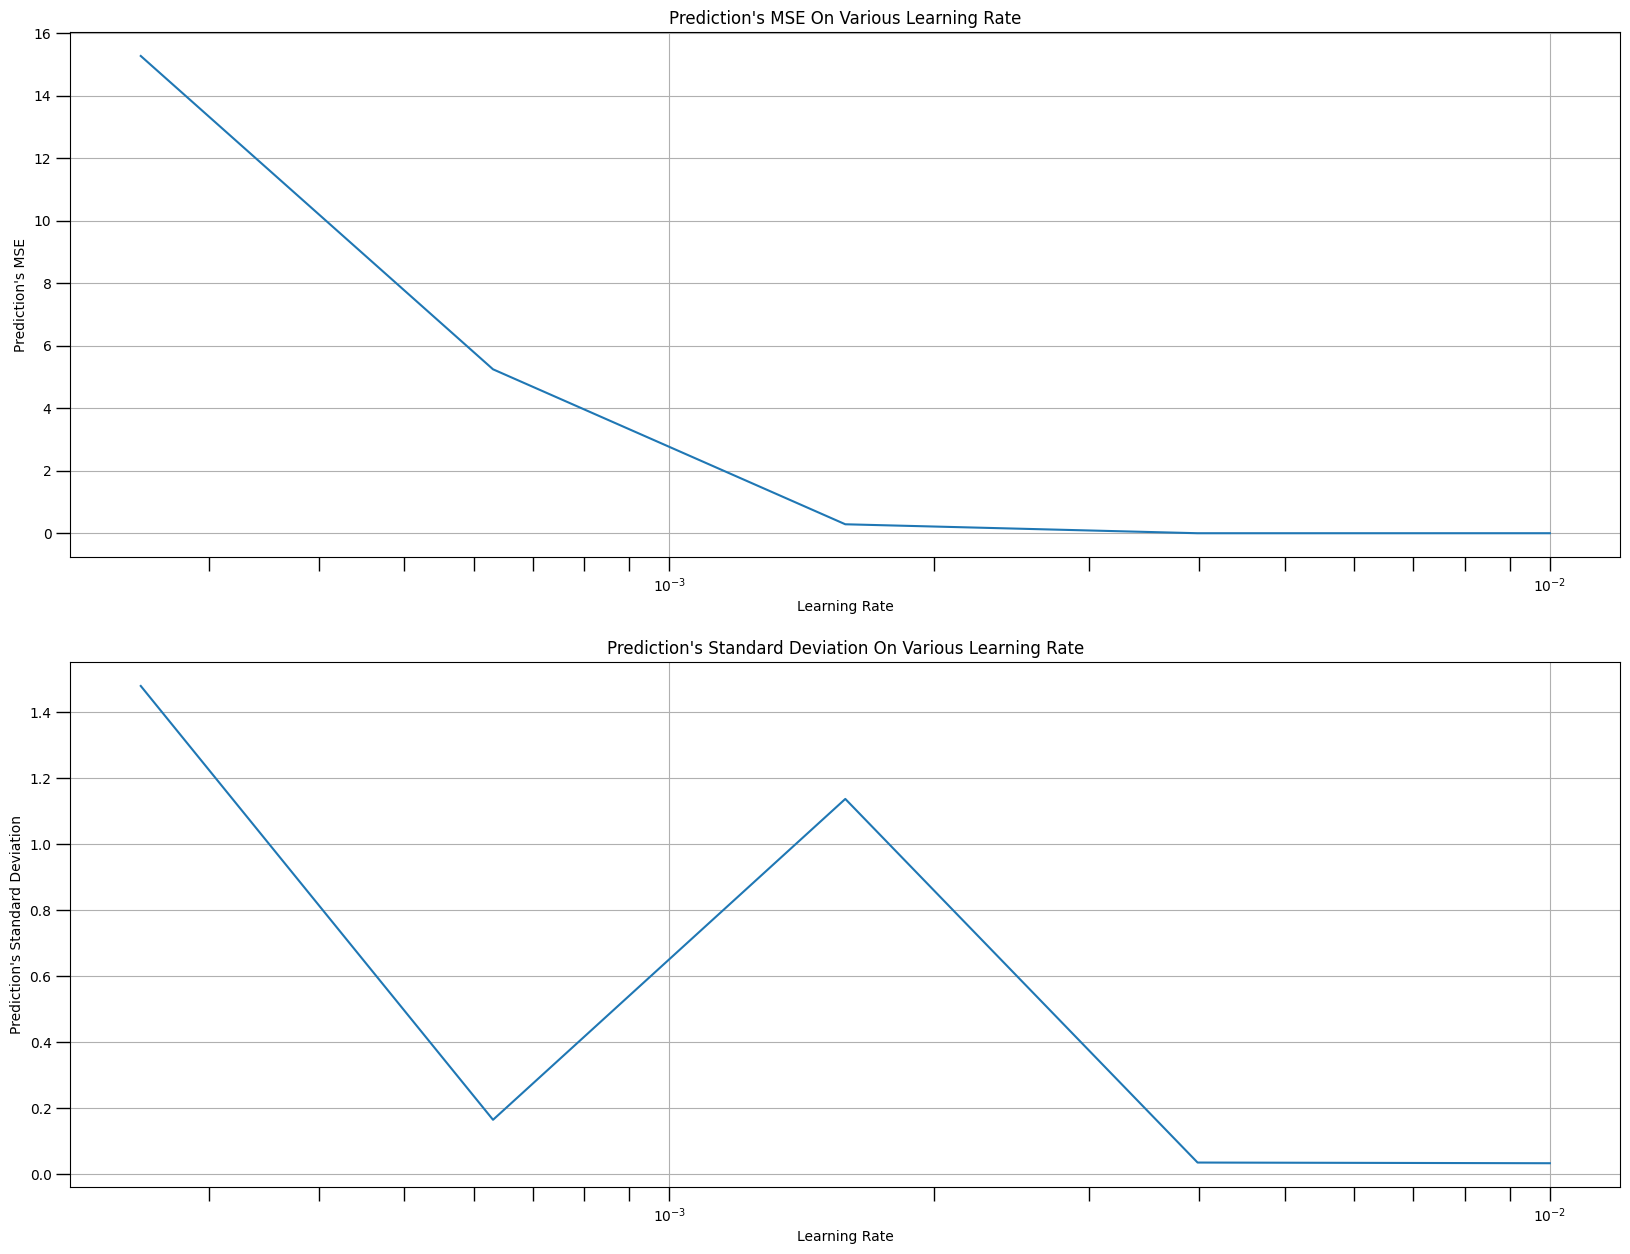

In [31]:
bnn_lr_tuning.visualize_learning_rate_tuning()

# Model Performance On Data With Outliers

## Data Preparation

In [ ]:
x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

y_data[-5] *= 0.75
y_data[15] *= 2
y_data[40] *= 0.1
y_data[70] *= 0.5
y_data[-20] *= 2.5

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 5)
plt.plot(x_data, y_data)

## Learning Rate Tuning

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

initial_lr_power = 1
end_lr_power = 20
total_iters = 100
tuning_epochs = 25
window_size = 3

In [ ]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr_power=initial_lr_power, end_lr_power=end_lr_power, total_iters=total_iters, tuning_epochs=tuning_epochs)

In [ ]:
bnn_lr_tuning.learning_rate_tuning()

In [ ]:
bnn_lr_tuning.visualize_learning_rate_tuning()

## Model Fitting and Performances

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

window_size = 3
initial_lr = 1e-5
end_lr = 1e-10

total_epochs = 100
learning_rate_decay_type = 'exponential'

In [ ]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [ ]:
bnn.train_model(total_epochs, learning_rate_decay_type)

In [ ]:
bnn.visualize_performance()

In [ ]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()